[Inhaltsverzeichnis](../AP4.ipynb) | [TASK 4.1](wohin?)

## 4.1.3 Residuallast

In [2]:
# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

In [3]:
# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

In [4]:
%matplotlib inline
import FLUCCOplus.notebooks as config
from FLUCCOplus.utils import *

import FLUCCOplus.electricitymap as elmap



FLUCCOplus.config  loaded!
FLUCCOplus.notebooks loaded!


### Residual load report
> The residual load $R$ at any time $t$ is simply
> defined as $R = L - P_{RES}$, where $L$ is the total load of all consumers,
> and $P_{RES}$ is the total power production of all volatile renewable energy sources in a given system boundary
>

Since the electricitymap dataset from 2015-2017 does not include the volatile production $P_{RES}$,
 but rather only their consumption after exports,
the residual load $R$ can not readily be derived from it. At a later stage, the differences in volatile production
and consumption can be investigated.

The following report is therefore limited to the timeframe from 2018 to 2019.
____
Before we start, we need to make sure that all *power_consumptions* are present and accounted for

In [29]:
em = elmap.fetch_1819()

['power_production_biomass_avg', 'power_production_hydro_avg', 'power_production_solar_avg', 'power_production_wind_avg', 'power_production_geothermal_avg', 'power_production_coal_avg', 'power_production_gas_avg', 'power_production_nuclear_avg', 'power_production_oil_avg', 'power_production_unknown_avg']


In [ ]:
print(elmap.pps)

Are all power production variable available  in the processed electricitymap dataframe?

In [26]:
set(elmap.pps).issubset(em)

True

Calculate total production of renewables and residual load

In [31]:
em["total_production_RE_avg"] = em[elmap.pps_RE].sum(axis=1)
em["total_production_NRE_avg"] = em[elmap.pps_NRE].sum(axis=1)

The total production should match the renewable and non renewable production:

<AxesSubplot:xlabel='datetime'>

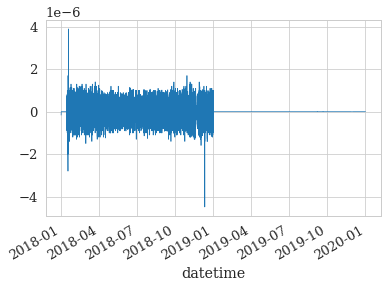

In [36]:
(em["total_production_RE_avg"]
 + em["total_production_NRE_avg"]
 - em["total_production_avg"]).plot()

Huh! What happened from 2018 to 2019?

Granted, it's a small error, probably due to statistical uncertainties in balancing, but odd nonetheless

One should also assert that

$$ Production - Exports + Imports = Consumption $$

Before we do that, let's just rename the columns to drop all the prefices and suffices

In [ ]:
a = "power_production_solar_avg"


In [ ]:
em = (em
      .pipe(elmap.drop_suffixes))
(em["total_production_avg"])


In [ ]:
em["RE_residuallast_cons"] = em["total_consumption_avg"] - em["total_consumption_RE_avg"]

> note: this could be also done for

In [ ]:
em["total_consumption_RE_avg"] = em[elmap.pcs_RE].sum(axis=1)
em["total_consumption_NRE_avg"] = em[elmap.pcs_NRE].sum(axis=1)
em["total_consumption_discharge_avg"] =  em[elmap.pcs_discharge].sum(axis=1)
# em["res"]
#     plot residualload
#     tabulate summary (GWh, max, min, hours positive, hours negative

